In [1]:
#導入需要的函式庫
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
#連接到雲端
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#從文件中讀取
file_path = 'drive/MyDrive/letturce_growing.xlsx'
df = pd.read_excel(file_path)
# 顯示前幾行數據以檢查
df.head()

,Plant ID,Date,Temperature,Humidity,CO2,area,height,weight
0,1,2024-05-23,24.1,71.1,1353,78,4,10
1,1,2024-05-25,24.7,69.5,1145,50,9,9
2,1,2024-05-27,23.4,77.0,824,85,10,10
3,1,2024-05-29,22.9,79.1,964,121,12,12
4,1,2024-05-31,24.7,74.7,990,160,8,16


In [4]:
#確保日期列為datetime格式
df['Date'] = pd.to_datetime(df['Date'])

# 分離特徵和目標
features = ['Temperature', 'Humidity', 'CO2', 'area', 'height']
target = 'weight'

# 將數據標準化
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [5]:
# 構建時間序列數據
def create_sequences(data, sequence_length):
    xs, ys = [], [] #輸入序列和目標值
    for i in range(len(data) - sequence_length): #數據範圍
        x = data[i:(i + sequence_length), :-1] #第一個至倒數二個
        y = data[i + sequence_length, -1]  #第一個到最後一個
        xs.append(x) #把x加到xs
        ys.append(y) #把y加到ys
    return np.array(xs), np.array(ys)

sequence_length = 3  # 設置回看天數為前3天（三次記錄）
plant_data = [] #儲存時間序列

# 為每顆植物創建序列數據
for plant_id in df['Plant ID'].unique():
    plant_df = df[df['Plant ID'] == plant_id].drop(columns=['Plant ID', 'Date']).values #獲取id
    X, y = create_sequences(plant_df, sequence_length) #其他數據轉numpy
    plant_data.append((X, y))

# 合併所有植物的數據
X_all = np.concatenate([data[0] for data in plant_data])
y_all = np.concatenate([data[1] for data in plant_data])

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.7, random_state=42)

In [6]:
# 建立GRU模型
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(sequence_length, X_train.shape[2])))
model.add(Dense(2))

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.004), loss='mse')

# 訓練模型
history = model.fit(X_train, y_train, epochs=430, batch_size=62, validation_split=0.2)


Epoch 1/430
1/1 [==============================] - 6s 6s/step - loss: 1383.6896 - val_loss: 624.0442
Epoch 2/430
1/1 [==============================] - 0s 75ms/step - loss: 1380.0205 - val_loss: 621.4219
Epoch 3/430
1/1 [==============================] - 0s 67ms/step - loss: 1376.3195 - val_loss: 618.7079
Epoch 4/430
1/1 [==============================] - 0s 66ms/step - loss: 1372.5312 - val_loss: 615.8881
Epoch 5/430
1/1 [==============================] - 0s 74ms/step - loss: 1368.5844 - val_loss: 612.9232
Epoch 6/430
1/1 [==============================] - 0s 70ms/step - loss: 1364.4022 - val_loss: 609.7998
Epoch 7/430
1/1 [==============================] - 0s 69ms/step - loss: 1359.9445 - val_loss: 606.4670
Epoch 8/430
1/1 [==============================] - 0s 74ms/step - loss: 1355.1312 - val_loss: 602.8420
Epoch 9/430
1/1 [==============================] - 0s 54ms/step - loss: 1349.8596 - val_loss: 598.9067
Epoch 10/430
1/1 [==============================] - 0s 58ms/step - loss: 13

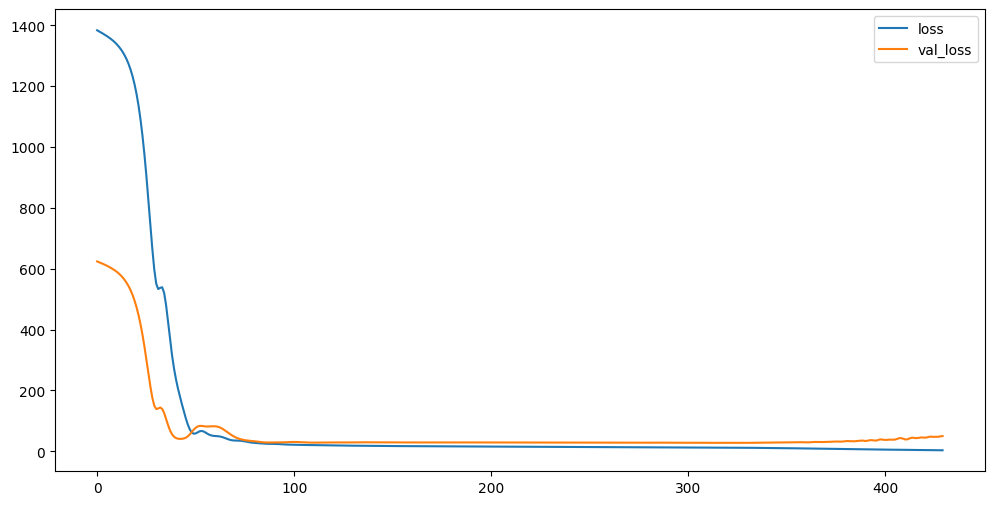

In [7]:
# 繪製損失函數
plt.figure(figsize = (12, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [8]:
# 提取GRU層的權重
gru_weights = model.layers[0].get_weights()

# 提取Dense層的權重
dense_weights = model.layers[1].get_weights()

# 計算每個特徵的權重平均值
feature_means = np.mean(np.abs(gru_weights[0]), axis=1)

# 打印每個特徵的平均權重
for feature, mean_weight in zip(features, feature_means):
    print(f"{feature}: {mean_weight}")

Temperature: 0.14763402938842773
Humidity: 0.1680113971233368
CO2: 0.14290496706962585
area: 0.22158637642860413
height: 0.19878873229026794


3/3 [==============================] - 0s 5ms/step - loss: 130.1438
MSE: 130.1437530517578
1/1 [==============================] - 0s 216ms/step


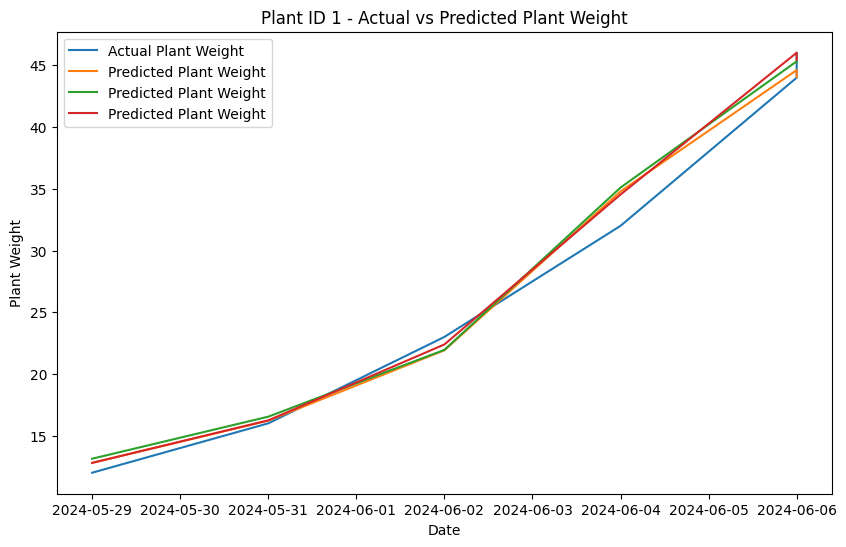

1/1 [==============================] - 0s 21ms/step


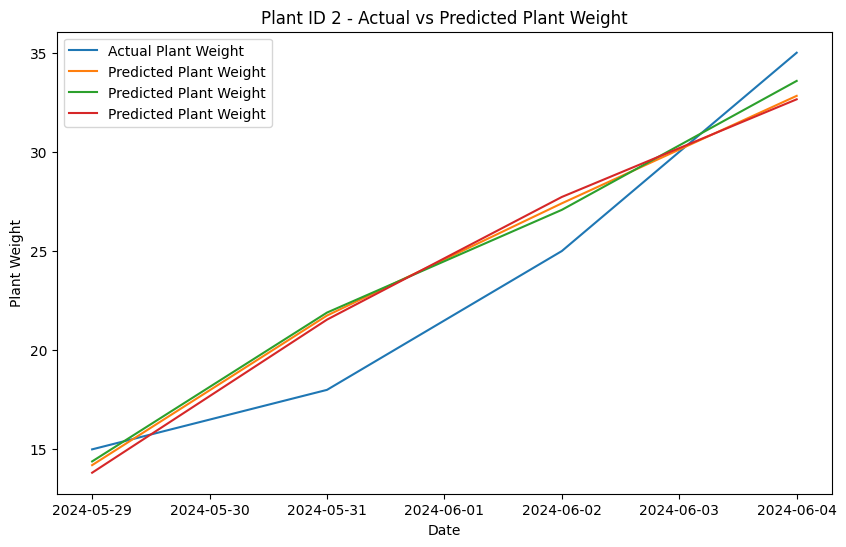

1/1 [==============================] - 0s 22ms/step


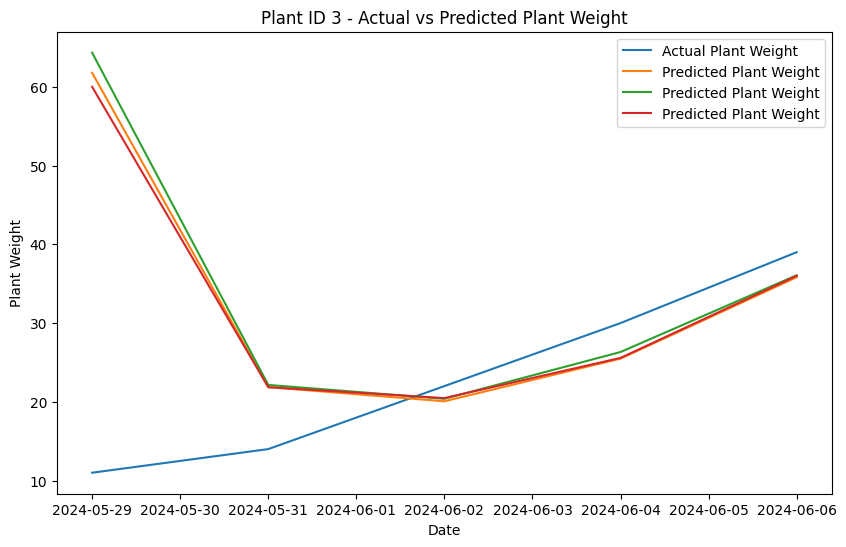

1/1 [==============================] - 0s 30ms/step


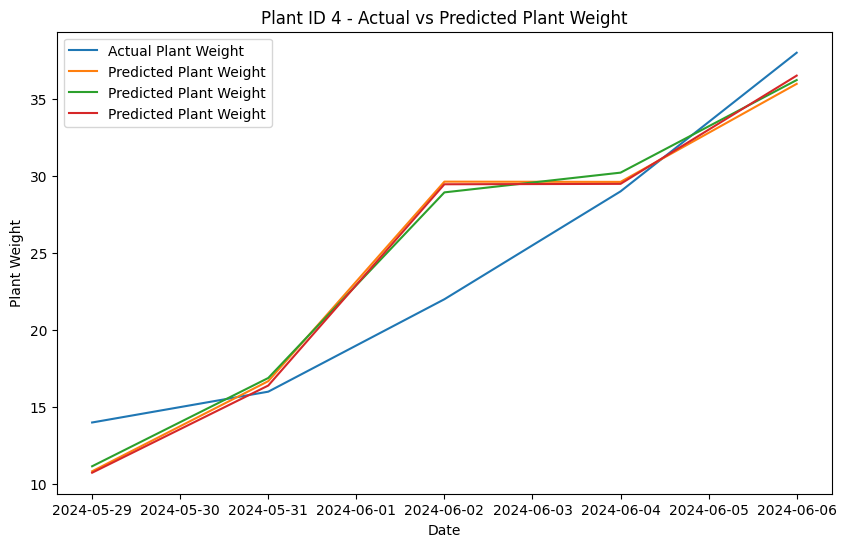

1/1 [==============================] - 0s 37ms/step


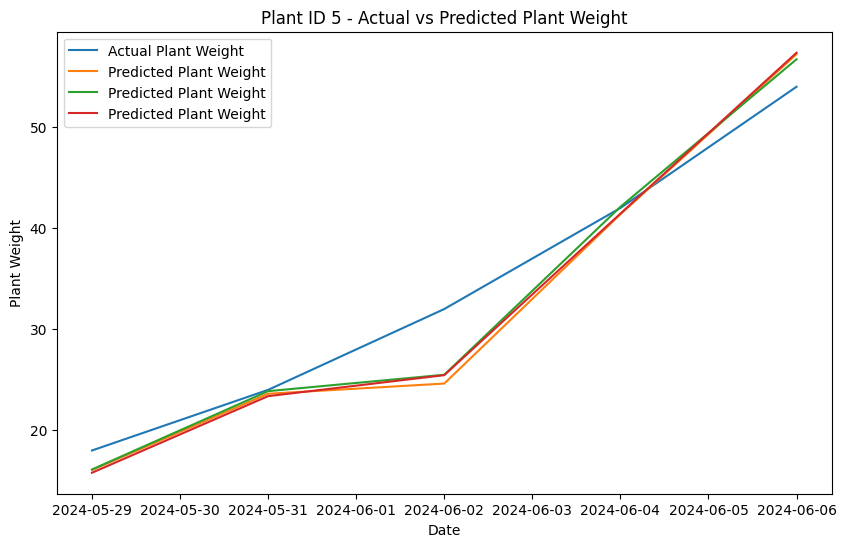

1/1 [==============================] - 0s 28ms/step


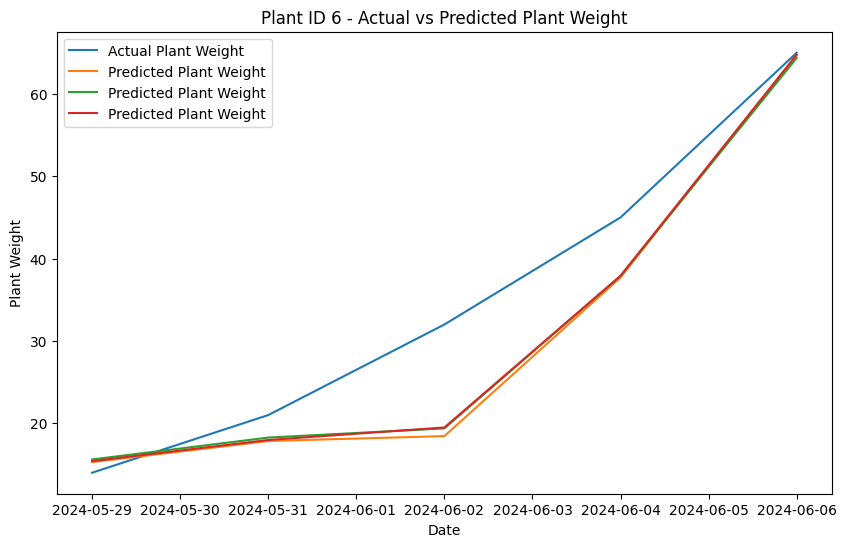

1/1 [==============================] - 0s 37ms/step


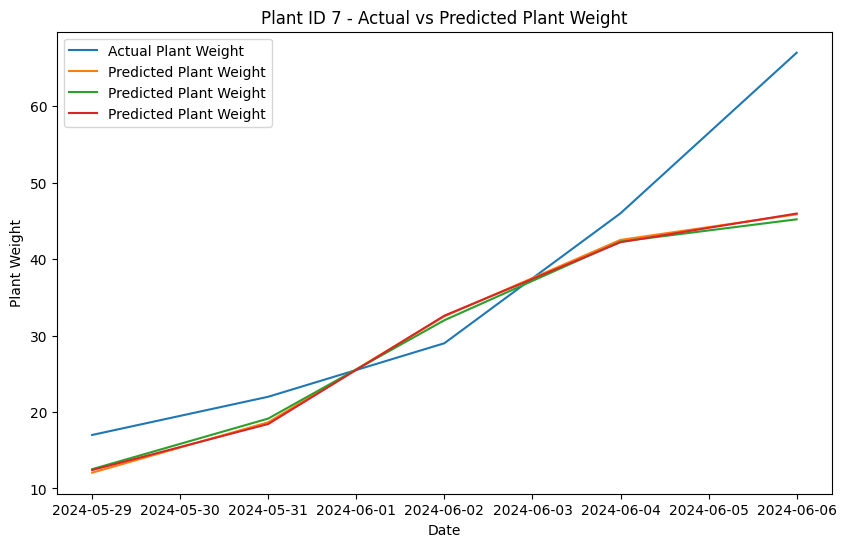

1/1 [==============================] - 0s 37ms/step


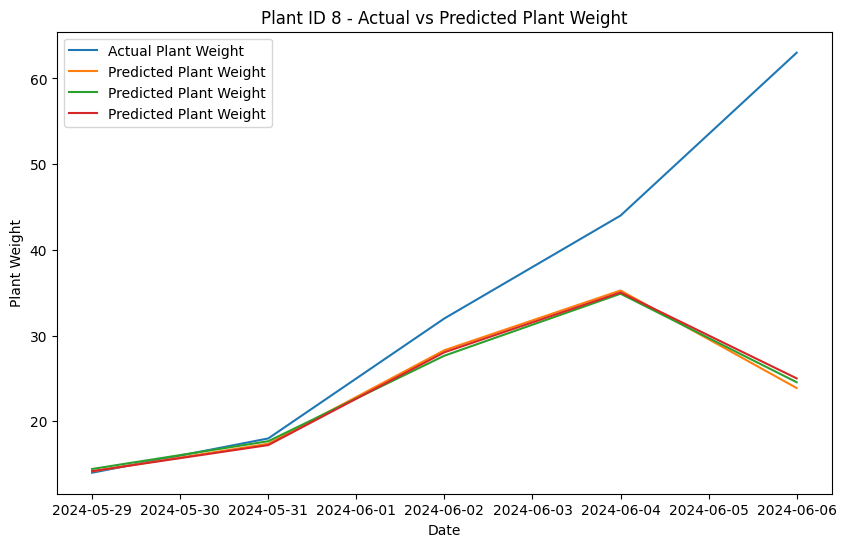

1/1 [==============================] - 0s 41ms/step


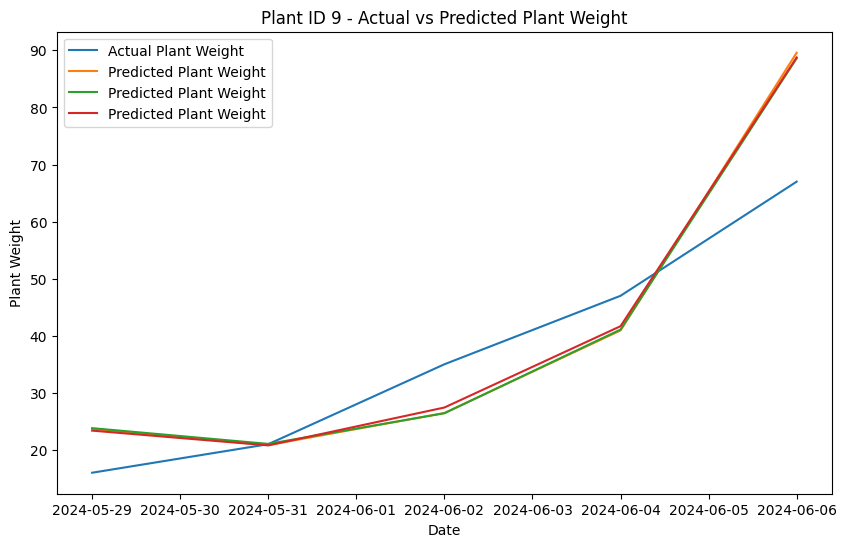

1/1 [==============================] - 0s 32ms/step


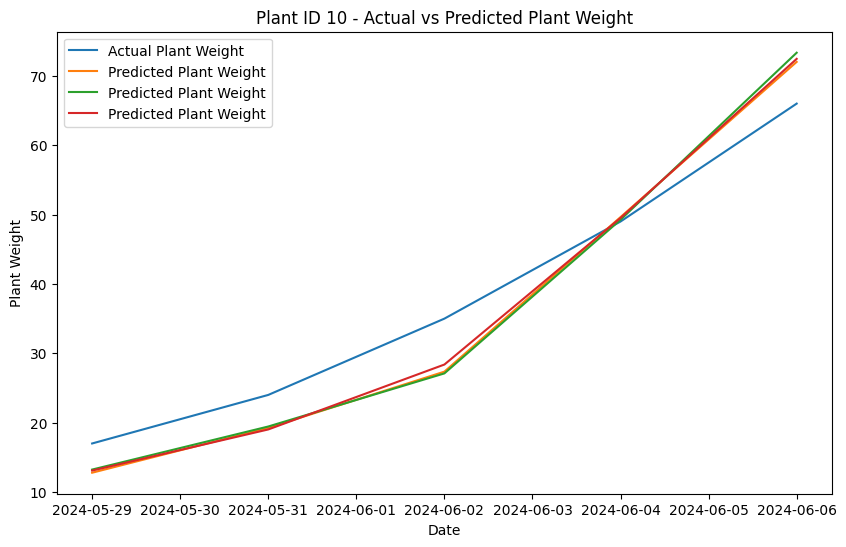

1/1 [==============================] - 0s 29ms/step


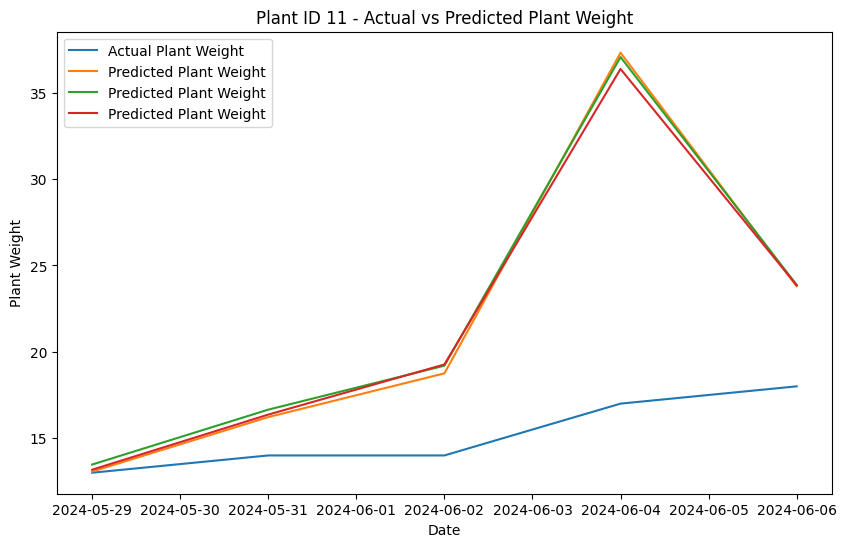

1/1 [==============================] - 0s 34ms/step


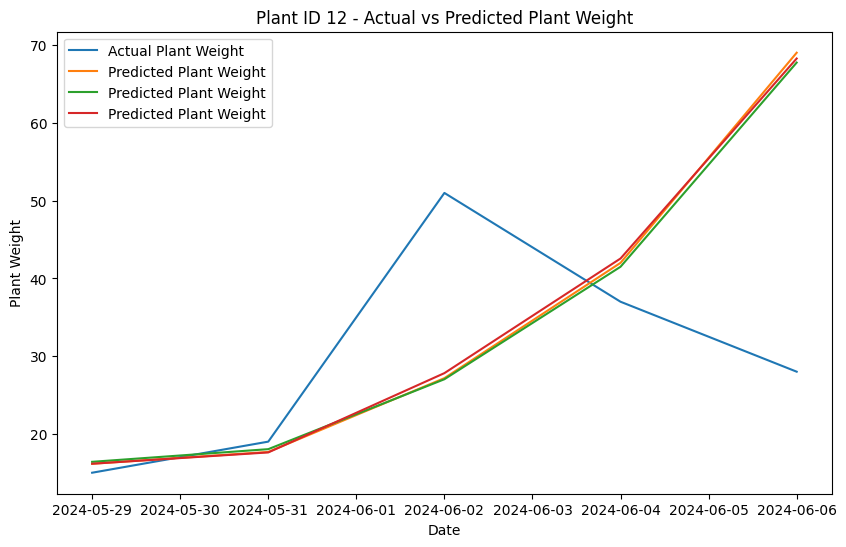

1/1 [==============================] - 0s 21ms/step


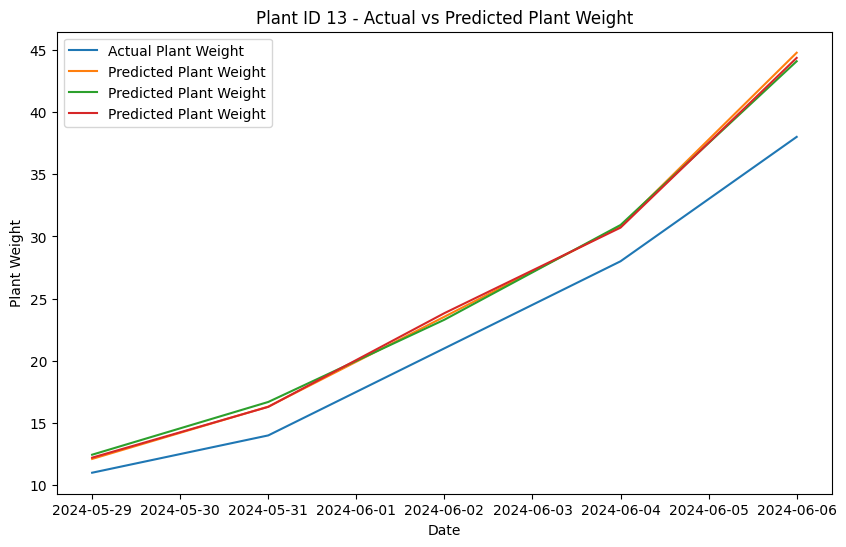

1/1 [==============================] - 0s 28ms/step


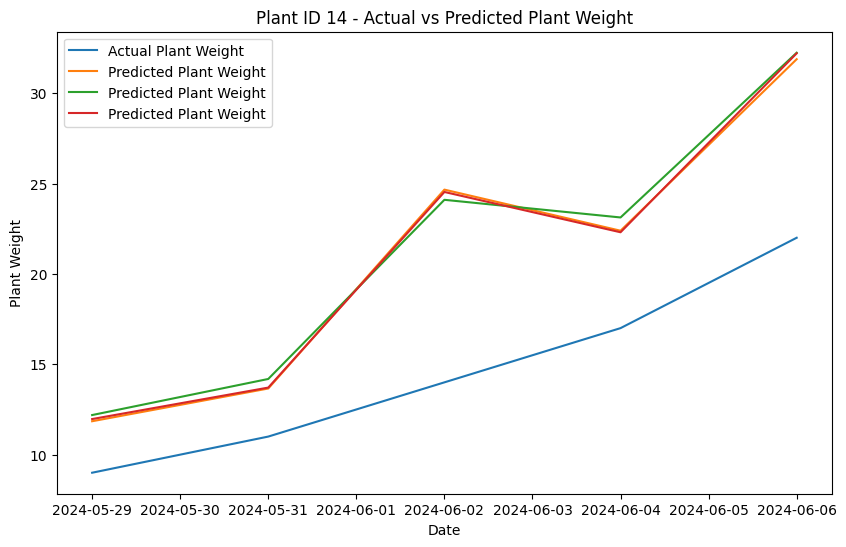

1/1 [==============================] - 0s 21ms/step


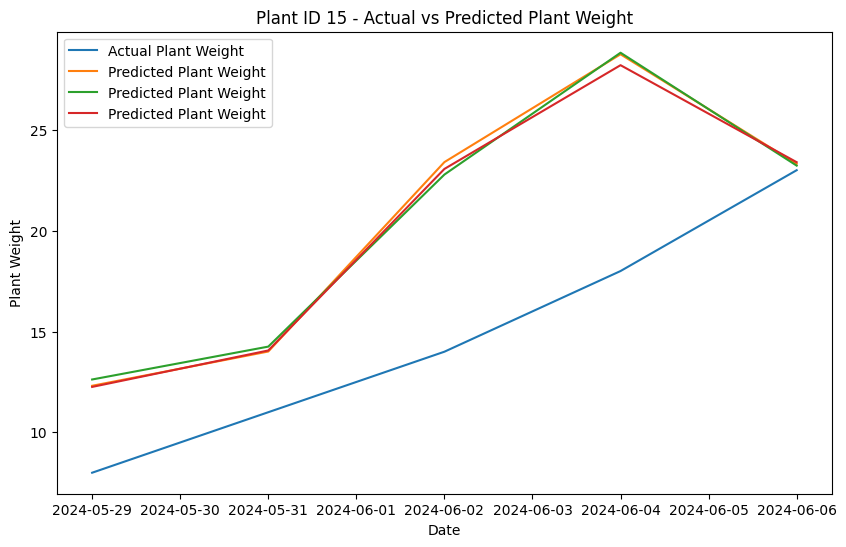

1/1 [==============================] - 0s 24ms/step


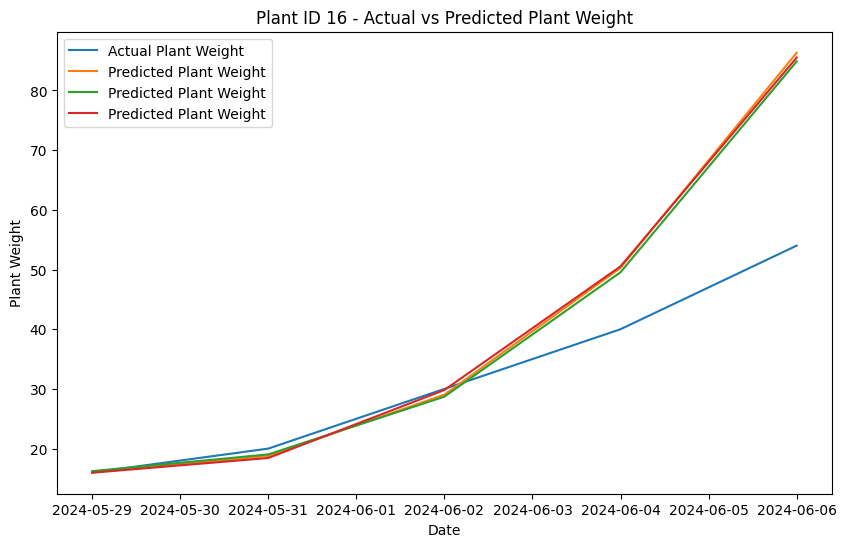

1/1 [==============================] - 0s 21ms/step


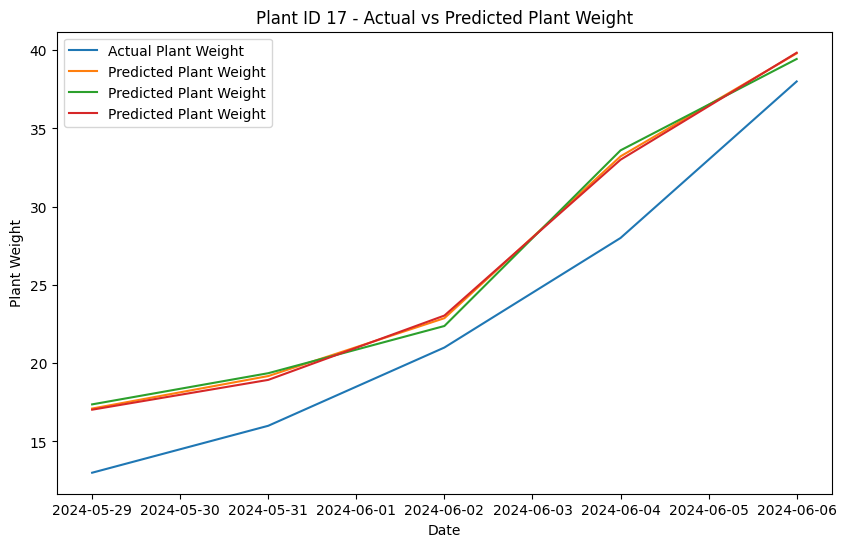

1/1 [==============================] - 0s 22ms/step


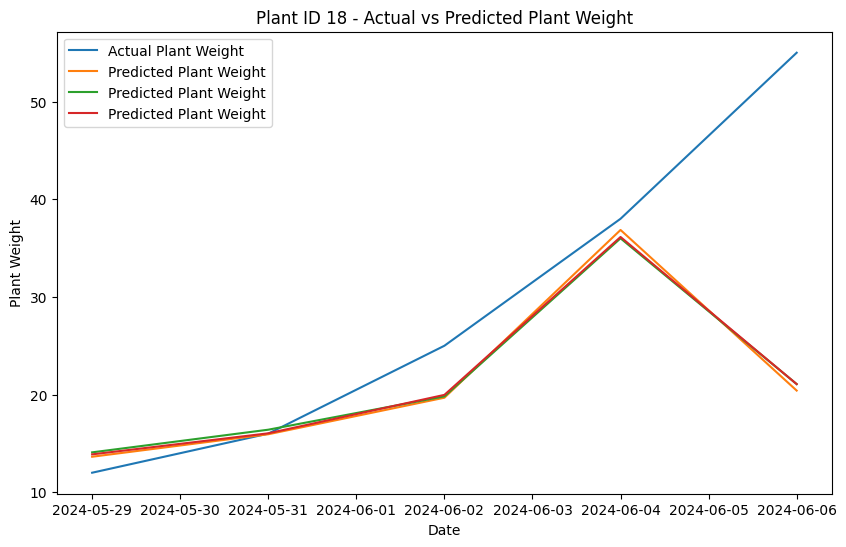

1/1 [==============================] - 0s 29ms/step


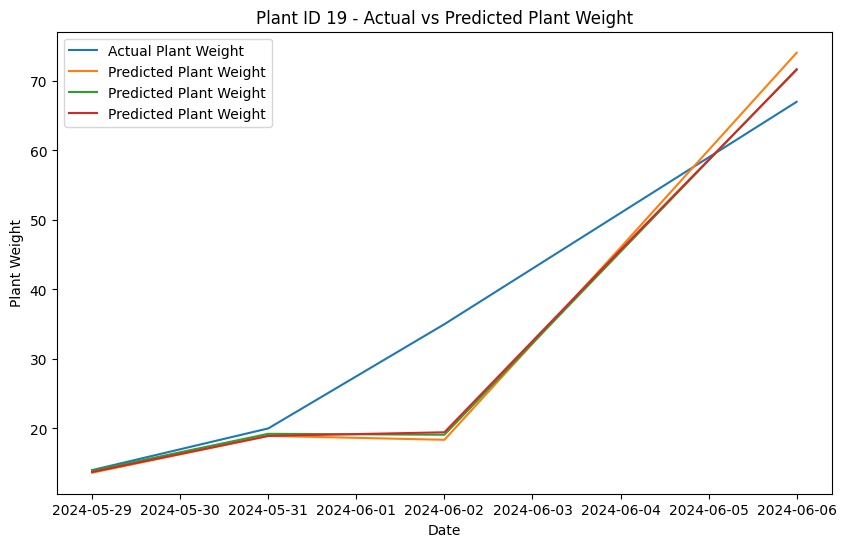

1/1 [==============================] - 0s 21ms/step


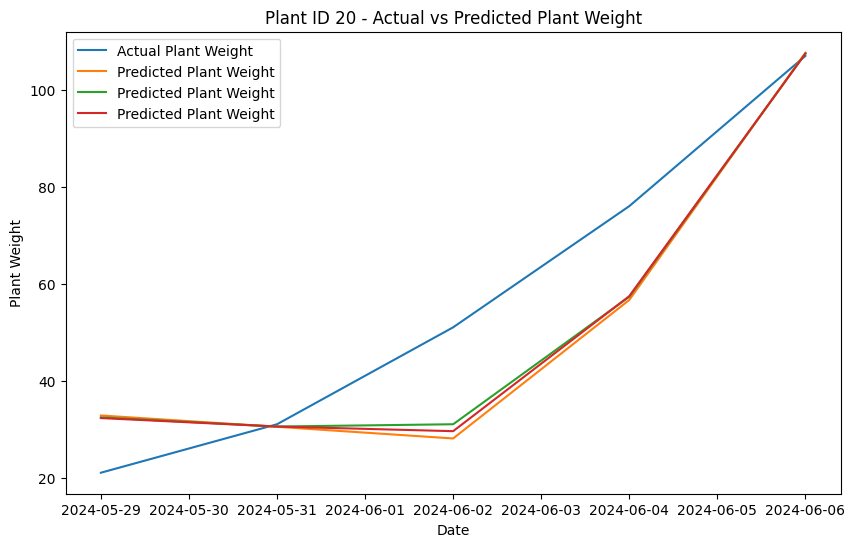

1/1 [==============================] - 0s 21ms/step


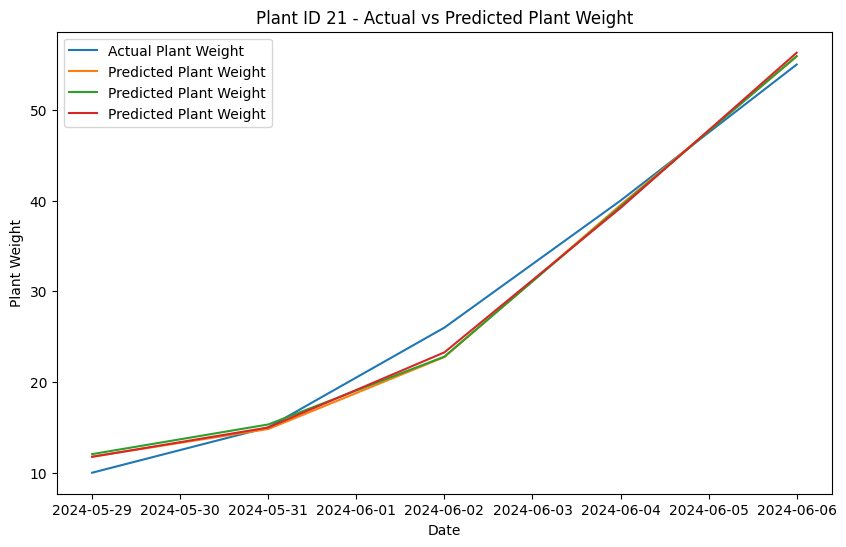

1/1 [==============================] - 0s 21ms/step


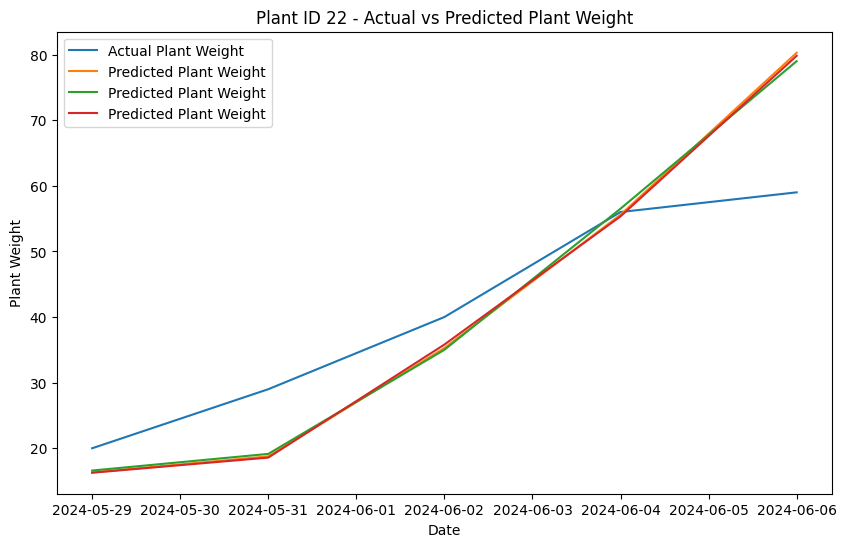

1/1 [==============================] - 0s 83ms/step


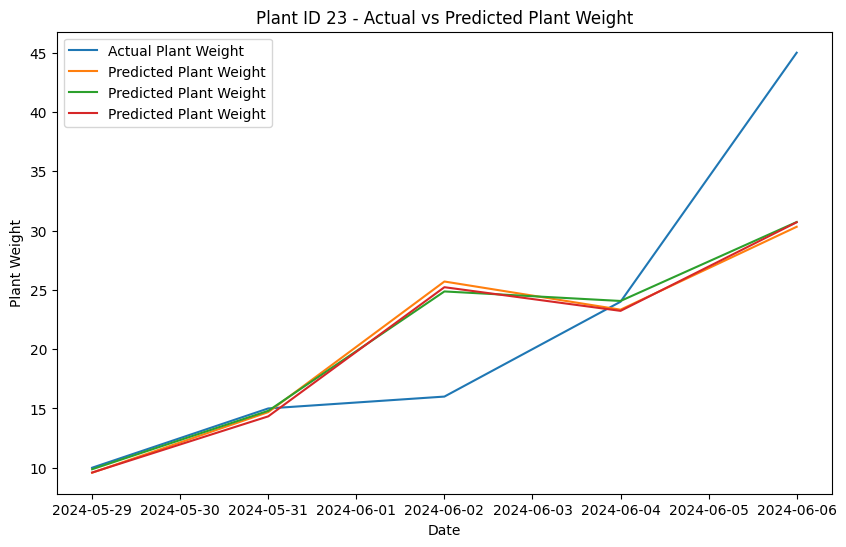

1/1 [==============================] - 0s 29ms/step


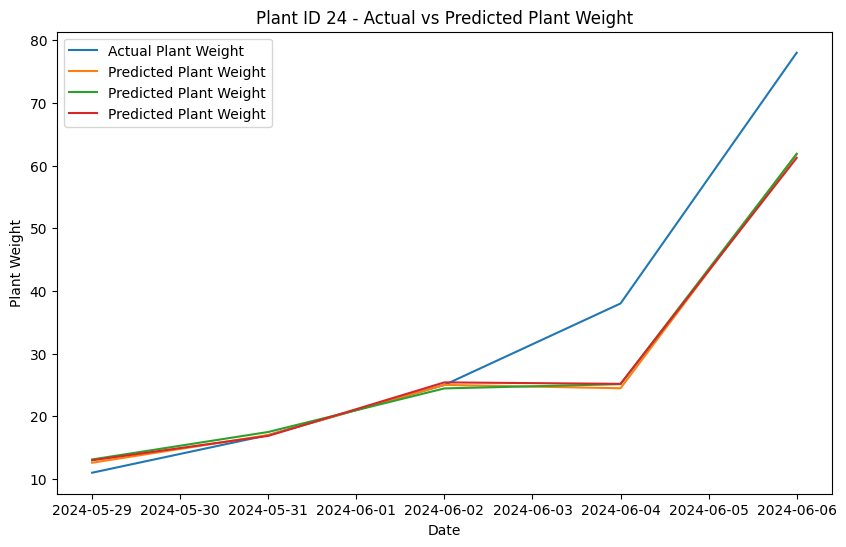

1/1 [==============================] - 0s 44ms/step


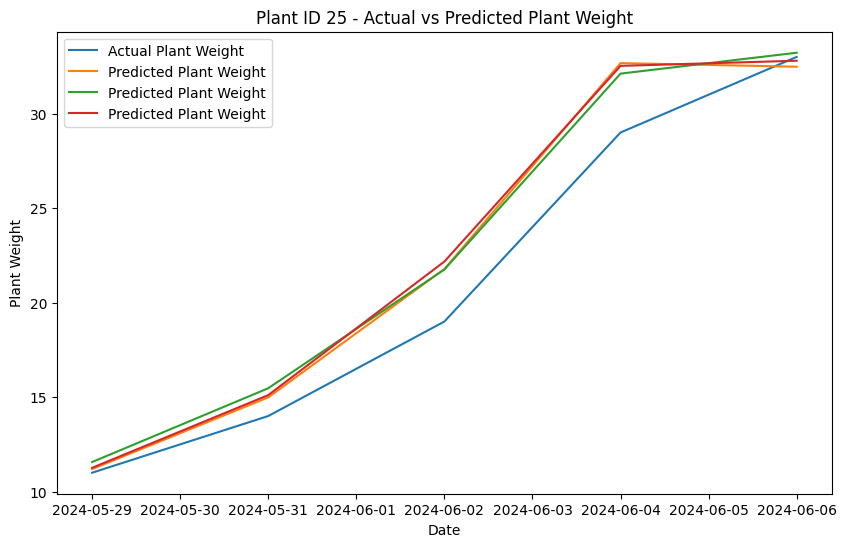

In [9]:
# 評估模型
mse = model.evaluate(X_test, y_test)
print(f'MSE: {mse}')


# 為每顆萵苣進行預測並繪圖
for plant_id in df['Plant ID'].unique():
    #取id對應的所有數據並按日期排列
    plant_df = df[df['Plant ID'] == plant_id].drop(columns=['Plant ID']).sort_values(by='Date')
    #保留特徵和目標值
    plant_values = plant_df.drop(columns=['Date']).values
    dates = plant_df['Date'].values[sequence_length:]  # 獲取日期，對應序列的y值

    #使用之前定義的函數得到預測值
    X, y = create_sequences(plant_values, sequence_length)
    y_pred = model.predict(X)

    # 繪圖
    plt.figure(figsize=(10, 6))
    plt.plot(dates, y, label='Actual Plant Weight')
    plt.plot(dates, y_pred, label='Predicted Plant Weight')  # 確保y_pred與dates對應
    plt.title(f'Plant ID {plant_id} - Actual vs Predicted Plant Weight')
    plt.xlabel('Date')
    plt.ylabel('Plant Weight')
    plt.legend()
    plt.show()